<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [123]:
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv('customers.csv')
data = data.drop(['Region','Channel'], axis=1)

In [124]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,76237,3473,7102,16538,778,918
2,68951,4411,12609,8692,751,2406
3,56159,555,902,10002,212,2916
4,56083,4563,2124,6422,730,3321


In [125]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


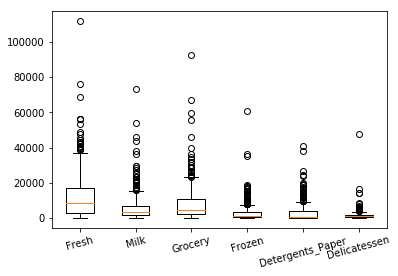

In [126]:
display_data=[data['Fresh'],data['Milk'],data['Grocery'],\
             data['Frozen'],data['Detergents_Paper'],\
             data['Delicatessen']]
plt.boxplot(display_data)
plt.xticks(range(1,7),data.columns,rotation=15)
plt.show()

In [127]:
indices = [10,289,338]
samples = pd.DataFrame(data.loc[indices]).reset_index()
samples

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10,44466,54259,55571,7782,24171,6465
1,289,5065,5499,11055,364,3485,1063
2,338,2932,6459,7677,2561,4573,1386


In [128]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
new_data = data.drop('Grocery',axis=1)
X_train,X_test,y_train,y_test = \
train_test_split(new_data,data['Grocery'],test_size=0.3,\
                random_state=0)
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
score = r2_score(y_test,pred)
print(score)


0.6391802445489232


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C21D224F28>,
      dtype=object)

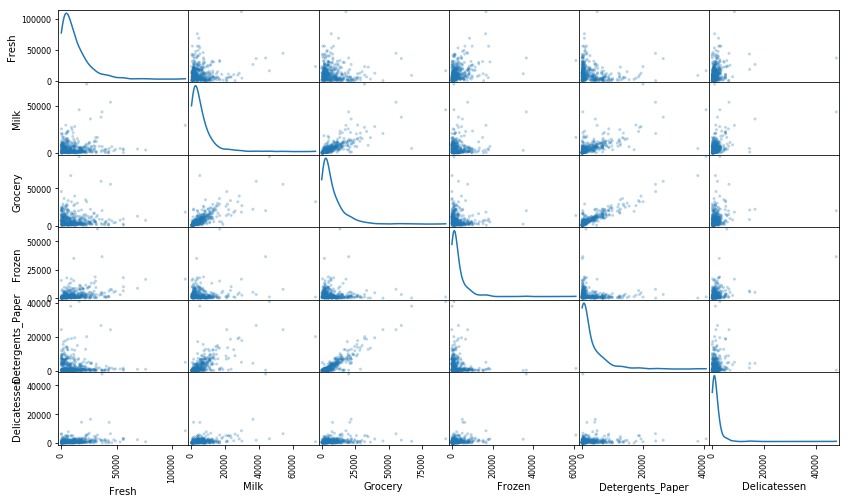

In [129]:
pd.scatter_matrix(data,alpha=0.3,\
                  figsize=(14,8),diagonal='kde')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C21EF2E588>,
      dtype=object)

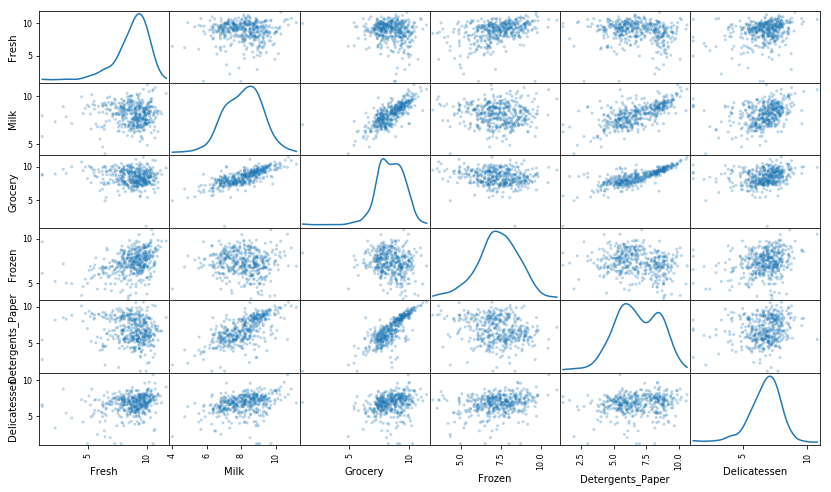

In [130]:
log_data = np.log(data)
log_samples = np.log(samples)
pd.scatter_matrix(log_data,alpha=0.3,\
                  figsize=(14,8),diagonal='kde')

In [131]:
display(log_samples)

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2.302585,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,5.666427,8.530109,8.612322,9.310638,5.897154,8.156223,6.968850
2,5.823046,7.983440,8.773230,8.945984,7.848153,8.427925,7.234177


In [132]:
all_outliers = np.array([],dtype='int64')
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    step = 1.5*(Q3-Q1)
    print("The outliers of %s are:" % feature)
    outlier_pts = log_data[~((log_data[feature] >=Q1-step) &\
                          (log_data[feature] <=Q3+step))]
    all_outliers = np.append(all_outliers,\
                             outlier_pts.index.values.astype('int64'))
    display(outlier_pts)
display(all_outliers)


The outliers of Fresh are:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
424,5.493061,9.468001,9.088399,6.683361,8.271037,5.351858
425,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
426,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
427,5.247024,6.588926,7.606885,5.501258,5.214936,4.844187
428,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
429,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382
430,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
431,4.762174,8.742574,9.961898,5.429346,9.069007,7.013016
432,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134
433,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523


The outliers of Milk are:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
60,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
61,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275
406,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
414,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802


The outliers of Grocery are:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
77,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
406,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


The outliers of Frozen are:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
26,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
67,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
216,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
280,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
300,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
303,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
345,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244
360,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
391,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
433,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523


The outliers of Detergents_Paper are:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
77,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
150,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


The outliers of Delicatessen are:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
13,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
16,10.602965,6.461468,8.188689,6.948897,6.077642,2.890372
20,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
21,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
332,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
356,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
376,7.431892,8.848509,10.177932,7.283448,9.646593,3.610918
384,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
393,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910
406,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


array([424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 439,  60,  61, 406, 414,  77, 406,  26,  67, 216, 280,
       300, 303, 345, 360, 391, 433,  77, 150,  13,  16,  20,  21, 332,
       356, 376, 384, 393, 406, 408, 420, 430, 437], dtype=int64)

In [133]:
all_outliers

array([424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 439,  60,  61, 406, 414,  77, 406,  26,  67, 216, 280,
       300, 303, 345, 360, 391, 433,  77, 150,  13,  16,  20,  21, 332,
       356, 376, 384, 393, 406, 408, 420, 430, 437], dtype=int64)

In [134]:
len(all_outliers)

48

In [135]:
all_outliers,indices = np.unique(all_outliers,\
                                 return_inverse=True)

In [136]:
all_outliers

array([ 13,  16,  20,  21,  26,  60,  61,  67,  77, 150, 216, 280, 300,
       303, 332, 345, 356, 360, 376, 384, 391, 393, 406, 408, 414, 420,
       424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 439], dtype=int64)

In [137]:
len(all_outliers)

42

In [138]:
indices

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,  5,
        6, 22, 24,  8, 22,  4,  7, 10, 11, 12, 13, 15, 17, 20, 35,  8,  9,
        0,  1,  2,  3, 14, 16, 18, 19, 21, 22, 23, 25, 32, 39],
      dtype=int64)

In [139]:

counts = np.bincount(indices)
outliers = all_outliers[counts>1]
outliers

array([ 77, 406, 430, 433, 437], dtype=int64)

In [140]:
dict(zip(all_outliers,indices))

{13: 26,
 16: 27,
 20: 28,
 21: 29,
 26: 30,
 60: 31,
 61: 32,
 67: 33,
 77: 34,
 150: 35,
 216: 36,
 280: 37,
 300: 38,
 303: 39,
 332: 40,
 345: 41,
 356: 5,
 360: 6,
 376: 22,
 384: 24,
 391: 8,
 393: 22,
 406: 4,
 408: 7,
 414: 10,
 420: 11,
 424: 12,
 425: 13,
 426: 15,
 427: 17,
 428: 20,
 429: 35,
 430: 8,
 431: 9,
 432: 0,
 433: 1,
 434: 2,
 435: 3,
 436: 14,
 437: 16,
 438: 18,
 439: 19}